# Natural Language Processing (NLP) - Recurrent Neural Network (RNN)

## Summary:
**Dataset:** Names and their corresponding origins  
**Model:** Classifies the origin of names using a character-level RNN    
**Particulars:** Words and characters tokenization, neural-network with embedding layer and recurrent layers, softmax output  

## Table of Contents:
* Section 1 - Exploring Data and Restructuring
* Section 2 - Pre-processing the Inputs (Names)
* Section 3 - Pre-processing the Labels (Origins)
* Section 4 - Generating Model and Training
* Section 5 - Final Model and Results
* Section 6 - Function to Use the Final Model

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from glob import glob
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Embedding, LSTM, GRU, SimpleRNN

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Importing data:  collection of text files containing names of a specific origin

t = !ls data.zip
if(t[0]!="data.zip"):
  !wget https://download.pytorch.org/tutorial/data.zip
  !unzip data.zip

--2023-02-28 23:39:24--  https://download.pytorch.org/tutorial/data.zip
Resolving download.pytorch.org (download.pytorch.org)... 13.227.219.81, 13.227.219.79, 13.227.219.108, ...
Connecting to download.pytorch.org (download.pytorch.org)|13.227.219.81|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2882130 (2.7M) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>]   2.75M  --.-KB/s    in 0.03s   

2023-02-28 23:39:24 (84.4 MB/s) - ‘data.zip’ saved [2882130/2882130]

Archive:  data.zip
   creating: data/
  inflating: data/eng-fra.txt        
   creating: data/names/
  inflating: data/names/Arabic.txt   
  inflating: data/names/Chinese.txt  
  inflating: data/names/Czech.txt    
  inflating: data/names/Dutch.txt    
  inflating: data/names/English.txt  
  inflating: data/names/French.txt   
  inflating: data/names/German.txt   
  inflating: data/names/Greek.txt    
  inflating: data/names/Irish.txt    
  inflating: data/names/I

# Section 1 - Exploring Data and Restructuring

In [3]:
open('data/names/Korean.txt').readlines(20)

['Ahn\n', 'Baik\n', 'Bang\n', 'Byon\n', 'Cha\n']

In [4]:
# Creates a list of the names and a list of their origins
# Loops take the name from inside file contents and the origin from .txt filename

data = []
for filename in glob('data/names/*.txt'):

  origin = filename.split('/')[-1].split('.txt')[0]
  names = open(filename).readlines()
  print(origin, "no. of names:", len(names))

  for name in names:
    data.append((name.strip(), origin))

names, origins = zip(*data)

Russian no. of names: 9408
Vietnamese no. of names: 73
Polish no. of names: 139
Scottish no. of names: 100
Arabic no. of names: 2000
Greek no. of names: 203
Portuguese no. of names: 74
Dutch no. of names: 297
Czech no. of names: 519
Korean no. of names: 94
English no. of names: 3668
German no. of names: 724
Spanish no. of names: 298
Chinese no. of names: 268
French no. of names: 277
Irish no. of names: 232
Italian no. of names: 709
Japanese no. of names: 991


In [5]:
# Exploration of the lists created

print(data[:5])
print(names[:5])
print(origins[:5])
print('\n')

origins_list = list(set(origins))
print(origins_list)
print('\n')

print("Names list length:", len(data))
print("Origins set length:", len(origins_list))

[('Ababko', 'Russian'), ('Abaev', 'Russian'), ('Abagyan', 'Russian'), ('Abaidulin', 'Russian'), ('Abaidullin', 'Russian')]
('Ababko', 'Abaev', 'Abagyan', 'Abaidulin', 'Abaidullin')
('Russian', 'Russian', 'Russian', 'Russian', 'Russian')


['French', 'Polish', 'Irish', 'Dutch', 'Greek', 'English', 'Arabic', 'Spanish', 'Portuguese', 'German', 'Czech', 'Italian', 'Japanese', 'Scottish', 'Vietnamese', 'Russian', 'Chinese', 'Korean']


Names list length: 20074
Origins set length: 18


# Section 2 - Pre-processing the Inputs (Names)

In [6]:
# Tokenizing all the characters from the list of names
# and ordering them into a sequence to represent the names as vectors

tokenizer_names = Tokenizer(char_level=True)
tokenizer_names.fit_on_texts(names)
tokenizer_names.word_index
print('\n')
print("Length of tokens list:", len(tokenizer_names.word_index))

sequenced_names = tokenizer_names.texts_to_sequences(names)

#Checking that the sequencing was done properly
print('\n')
sequenced_names[:5]
print('\n')
names[:5]

{'a': 1,
 'o': 2,
 'e': 3,
 'i': 4,
 'n': 5,
 'r': 6,
 's': 7,
 'h': 8,
 'k': 9,
 'l': 10,
 'v': 11,
 't': 12,
 'u': 13,
 'm': 14,
 'd': 15,
 'b': 16,
 'y': 17,
 'g': 18,
 'c': 19,
 'z': 20,
 'f': 21,
 'p': 22,
 'j': 23,
 'w': 24,
 ' ': 25,
 'q': 26,
 "'": 27,
 'x': 28,
 '-': 29,
 'ö': 30,
 'é': 31,
 'í': 32,
 'ó': 33,
 'á': 34,
 'ä': 35,
 'ü': 36,
 'à': 37,
 'ß': 38,
 'ú': 39,
 'ñ': 40,
 ',': 41,
 'ś': 42,
 '1': 43,
 'ò': 44,
 'ż': 45,
 'ã': 46,
 'è': 47,
 '\xa0': 48,
 'ń': 49,
 'ł': 50,
 'ą': 51,
 'õ': 52,
 '/': 53,
 ':': 54,
 'ê': 55,
 'ç': 56,
 'ù': 57,
 'ì': 58}



Length of tokens list: 58




[[1, 16, 1, 16, 9, 2],
 [1, 16, 1, 3, 11],
 [1, 16, 1, 18, 17, 1, 5],
 [1, 16, 1, 4, 15, 13, 10, 4, 5],
 [1, 16, 1, 4, 15, 13, 10, 10, 4, 5]]

('Ababko', 'Abaev', 'Abagyan', 'Abaidulin', 'Abaidullin')

In [7]:
#Padding name vectors with 0's on the front end in order to generate vectors of equal length

name_lengths = []
for i in (sequenced_names):
  name_lengths.append(len(i))

max_length = max(name_lengths)
print(max_length, '\n')

x = np.array(pad_sequences(sequenced_names, maxlen=max_length))

print('\n')
x[0:3]

20 





array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 16,
         1, 16,  9,  2],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        16,  1,  3, 11],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 16,  1,
        18, 17,  1,  5]], dtype=int32)

# Section 3 - Pre-processing the Labels (Origins)

In [8]:
# Tokenizing each of the 18 origin values and converting them to one-hot encoded vectors

tokenizer_origins = Tokenizer()
tokenizer_origins.fit_on_texts(origins)
tokenizer_origins.word_index

indexed_origins = tokenizer_origins.texts_to_sequences(origins)

# Converting the list indeces into one-hot encoded vectors
y = to_categorical(list(np.array(indexed_origins)-1), num_classes=18)

print('\n')
indexed_origins[:2]+indexed_origins[-2:]
print('\n')
origins[:2]+origins[-2:]
print('\n')
y[:2]
print('\n')
y[-2:]

{'russian': 1,
 'english': 2,
 'arabic': 3,
 'japanese': 4,
 'german': 5,
 'italian': 6,
 'czech': 7,
 'spanish': 8,
 'dutch': 9,
 'french': 10,
 'chinese': 11,
 'irish': 12,
 'greek': 13,
 'polish': 14,
 'scottish': 15,
 'korean': 16,
 'portuguese': 17,
 'vietnamese': 18}

[[1], [1], [4], [4]]

('Russian', 'Russian', 'Japanese', 'Japanese')

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]], dtype=float32)

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]], dtype=float32)

# Section 4 - Generating Model and Training

In [9]:
# Splitting data into training, validation, and test sets
x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size=0.20, shuffle=True, stratify=y, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.20, shuffle=True, stratify=y_train_val, random_state=1)

In [10]:
# Building a Fully Connected Neural Network Model
# NN contains an embedding layer, two recurrent layers, two dense layers
# with a softmax to output the probability predicted for each origin

def Name_Origin_Model(X, y, validation_data=None, epoch_number=15):
  K.clear_session()
  tf.random.set_seed(0)
  random.seed(0)

  #Embedding output will be of dimension 100
  model = Sequential()
  model.add(Embedding(len(tokenizer_names.word_index)+1, 100, input_length=max_length))
  model.add(GRU(150, return_sequences = True))
  model.add(GRU(150))
  model.add(Dense(150, activation='relu'))
  model.add(Dense(len(tokenizer_origins.word_index), activation='softmax'))

  model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

  h = model.fit(X, y, epochs = epoch_number, validation_data=(x_val, y_val))

  return model, h
  
model, h = Name_Origin_Model(x_train, y_train, validation_data=(x_val, y_val))

Epoch 1/15
402/402 [==============================] - 16s 15ms/step - loss: 0.1520 - accuracy: 0.4923 - val_loss: 0.1168 - val_accuracy: 0.5492
Epoch 2/15
402/402 [==============================] - 4s 9ms/step - loss: 0.1085 - accuracy: 0.6013 - val_loss: 0.0957 - val_accuracy: 0.6684
Epoch 3/15
402/402 [==============================] - 4s 10ms/step - loss: 0.0881 - accuracy: 0.6900 - val_loss: 0.0804 - val_accuracy: 0.7235
Epoch 4/15
402/402 [==============================] - 4s 9ms/step - loss: 0.0740 - accuracy: 0.7452 - val_loss: 0.0699 - val_accuracy: 0.7659
Epoch 5/15
402/402 [==============================] - 3s 8ms/step - loss: 0.0648 - accuracy: 0.7773 - val_loss: 0.0647 - val_accuracy: 0.7786
Epoch 6/15
402/402 [==============================] - 3s 9ms/step - loss: 0.0580 - accuracy: 0.8010 - val_loss: 0.0632 - val_accuracy: 0.7796
Epoch 7/15
402/402 [==============================] - 4s 10ms/step - loss: 0.0514 - accuracy: 0.8221 - val_loss: 0.0571 - val_accuracy: 0.8088
Ep

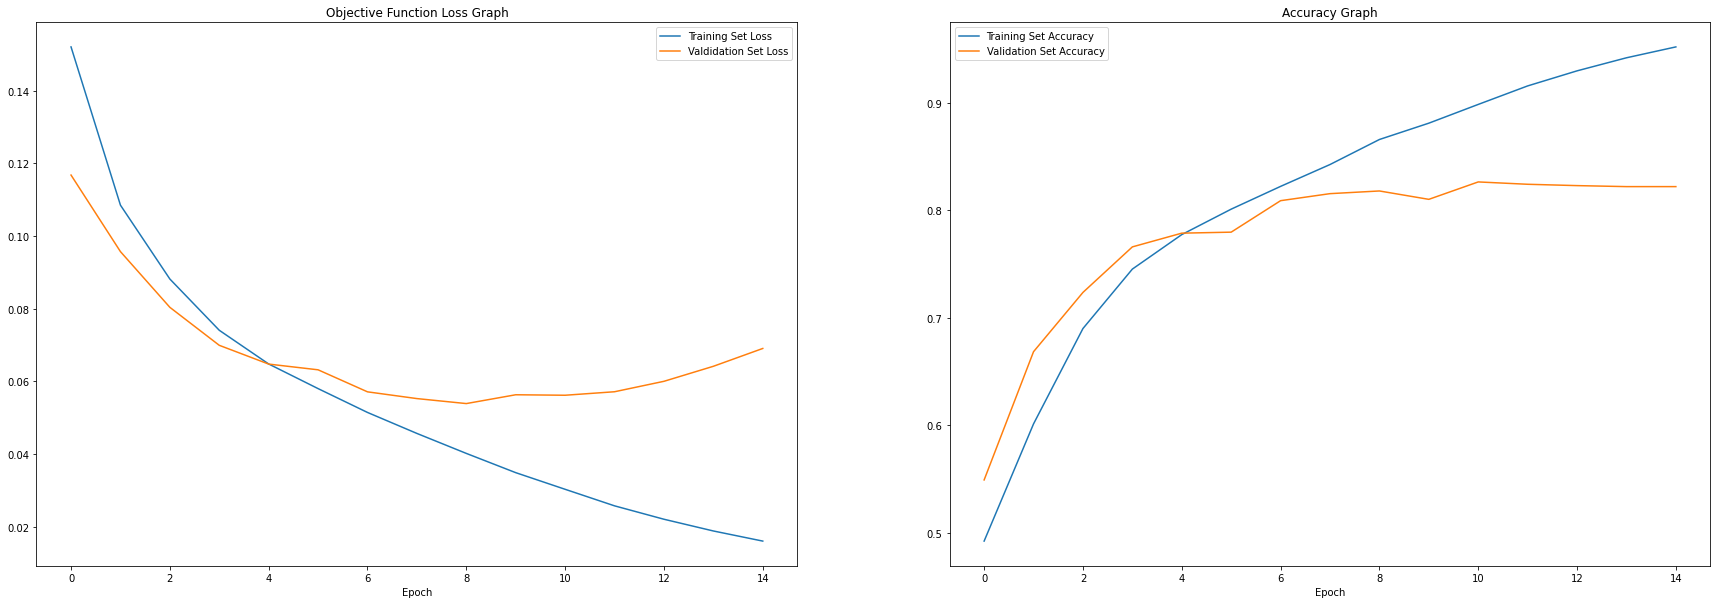

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(30, 10))

_ = ax[0].plot(h.history['loss'], label = 'Training Set Loss')
_ = ax[0].plot(h.history['val_loss'], label = 'Valdidation Set Loss')
_ = ax[0].set_xlabel('Epoch')
_ = ax[0].set_title('Objective Function Loss Graph')
_ = ax[0].legend()

_ = ax[1].plot(h.history['accuracy'], label = 'Training Set Accuracy')
_ = ax[1].plot(h.history['val_accuracy'], label = 'Validation Set Accuracy')
_ = ax[1].set_xlabel('Epoch')
_ = ax[1].set_title('Accuracy Graph')
_ = ax[1].legend()
    
plt.show()

# Section 5 - Final Model and Results

In [12]:
# Training the final model using test + validation sets and using the optimum epoch (hyperparameter) resulting from the previous best validation score

val_losses = np.array(h.history['val_loss'])
best_epoch = np.argmin(val_losses) + 1
print('Optimum epoch runs:', best_epoch)

model_final, h_final = Name_Origin_Model(x_train_val, y_train_val, epoch_number=best_epoch)

Optimum epoch runs: 9
Epoch 1/9
502/502 [==============================] - 12s 12ms/step - loss: 0.1428 - accuracy: 0.5059 - val_loss: 0.1113 - val_accuracy: 0.6077
Epoch 2/9
502/502 [==============================] - 5s 9ms/step - loss: 0.0958 - accuracy: 0.6577 - val_loss: 0.0844 - val_accuracy: 0.7021
Epoch 3/9
502/502 [==============================] - 5s 10ms/step - loss: 0.0777 - accuracy: 0.7279 - val_loss: 0.0693 - val_accuracy: 0.7540
Epoch 4/9
502/502 [==============================] - 4s 8ms/step - loss: 0.0660 - accuracy: 0.7733 - val_loss: 0.0601 - val_accuracy: 0.7858
Epoch 5/9
502/502 [==============================] - 5s 10ms/step - loss: 0.0569 - accuracy: 0.8036 - val_loss: 0.0518 - val_accuracy: 0.8213
Epoch 6/9
502/502 [==============================] - 4s 9ms/step - loss: 0.0501 - accuracy: 0.8251 - val_loss: 0.0446 - val_accuracy: 0.8512
Epoch 7/9
502/502 [==============================] - 4s 9ms/step - loss: 0.0444 - accuracy: 0.8481 - val_loss: 0.0403 - val_accu

In [13]:
# Evaluation of the final model using the test set
test_loss, test_accuracy = model_final.evaluate(x_test, y_test)

print('\n')
print('********The Accuracy on the test set is: %s********' % round(test_accuracy, 4))

126/126 [==============================] - 1s 5ms/step - loss: 0.0536 - accuracy: 0.8204


********The Accuracy on the test set is: 0.8204********


# Section 6 - Function to Use the Final Model

In [14]:
# Function that takes in a name and outputs the predicted origin
  # Converts input into padded sequences of tokens
  # Converts outputed softmax into the highest probability origins value

swap_origin_index = dict([(index, origin) for (origin, index) in tokenizer_origins.word_index.items()])

def predict_origin(name):
  assert isinstance(name, str)
  sequenced_name = tokenizer_names.texts_to_sequences([name])
  x_name = np.array(pad_sequences(sequenced_name, maxlen=max_length))
  y_output = model_final.predict(x_name)
  y_origin = swap_origin_index[np.argmax(y_output)+1]
  return y_origin

In [15]:
print('James', ' origin:', predict_origin('James'), '\n')
print('Evva', ' origin:', predict_origin('Evva'), '\n')

1/1 [==============================] - 1s 1s/step
James  origin: english 

1/1 [==============================] - 0s 27ms/step
Evva  origin: russian 

